In [2]:
import matplotlib.pyplot as plt
from matplotlib import container
import pickle
import numpy as np
import csv
legend_properties = {'weight':'bold'}

In [4]:
data_folder = r"E:\data\dao-0905-24\Regression\Threshold_Asymmetry_2"
dao_performance_file = data_folder + r"\dao_data"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
print(len(dao_performance))
print(dao_performance[0])
dao_performance = dao_performance

# return_dict[loop] = [dao.performance_across_time[-1], dao.performance_across_time[-2], dao.performance_across_time[-3],
#                      dao.performance_across_time[-4], dao.performance_across_time[-5], asymmetry, threshold_ratio,
#                      turbulence_freq, turbulence_level, lr]
column_names = ['performance_1', 'performance_2', 'performance_3', 'performance_4', 'performance_5', "asymmetry", 'threshold', 'turbulence_freq', 'turbulence_level', 'lr']
with open(data_folder + r'\dao_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(dao_performance)

2000
[0.5866984126984136, 0.5867301587301598, 0.5867619047619058, 0.5867619047619057, 0.5867619047619057, 4, 0.43000000000000005, 80, 0.18, 0.7]


In [12]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

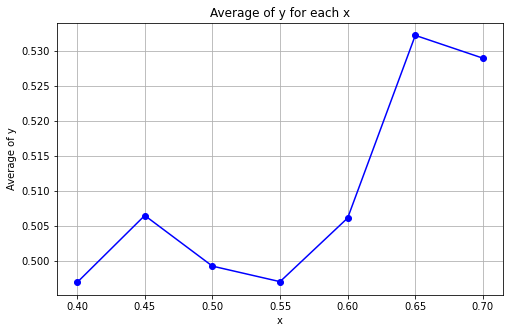

In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Sample data (y, x) pairs
data = [[row[0], row[5]] for row in dao_performance]
# Initialize a defaultdict for grouping y values by x
grouped_data = defaultdict(list)

# Group y values by their corresponding x
for y, x in data:
    grouped_data[x].append(y)

# Calculate the average of y for each x
x_vals = []
y_means = []

for x in sorted(grouped_data):
    y_vals = grouped_data[x]
    avg_y = np.mean(y_vals)
    x_vals.append(x)
    y_means.append(avg_y)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_means, marker='o', linestyle='-', color='b')
plt.title('Average of y for each x')
plt.xlabel('x')
plt.ylabel('Average of y')
plt.grid(True)
plt.show()

# 
# # Performance
# x = np.arange(0.40, 0.71, 0.01)
# fig, (ax1) = plt.subplots(1, 1)
# ax1.plot(x, dao_consensus, "k--", label="Consensus")
# ax1.plot(x, dao_performance, "k-", label="DAO")
# plt.xlabel('Threshold', fontweight='bold', fontsize=12)
# plt.ylabel('Performance', fontweight='bold', fontsize=12)
# # plt.xticks(x)
# handles, labels = ax1.get_legend_handles_labels()
# handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
# plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"\Performance_across_threshold.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()

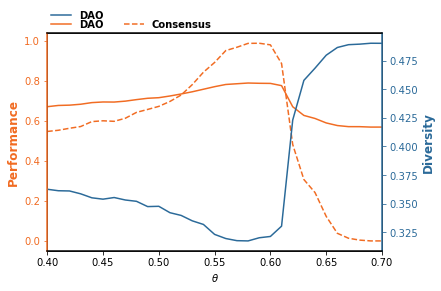

<Figure size 432x288 with 0 Axes>

In [15]:
# Twin
import numpy as np
x = np.arange(0.40, 0.71, 0.01)
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("$\\theta$", fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black",fontsize=12)

ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)

ax2.spines['left'].set_color(nature_orange) # left y-axis
ax1.yaxis.label.set_color(nature_orange) # left y-axis labels
ax1.tick_params(axis='y', colors=nature_orange) # left y-axis params
ax2.spines['right'].set_color(nature_blue) # right y-axis
ax2.yaxis.label.set_color(nature_blue)  # right y-axis labels
ax2.tick_params(axis='y', colors=nature_blue) # right y-axis params
plt.xlim([0.4, 0.70])

line_1 = ax1.plot(x, dao_performance, "k-", color=nature_orange, label="DAO")
line_2 = ax1.plot(x, dao_consensus, "k--", color = nature_orange, label="Consensus")

line_3 = ax2.plot(x, dao_diversity, "k-", color= nature_blue, label="DAO")

# line_4 = ax1.plot(x, [hierarchy_reference[-1]] * len(x), "k--", color=shallow_grey)
# ax1.annotate('best hierarchy', xy=(60, 208), xycoords='figure points', weight="bold")

lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=10, loc=(0, 1),  ncol=3, prop=legend_properties)

lines_2 = line_3
labs_2 = [l.get_label() for l in lines_1]
ax2.legend(lines_2, labs_2, frameon=False, fontsize=10, loc=(0, 1.04),  ncol=3, prop=legend_properties)

plt.savefig(data_folder + r"\Threshold_performance_diversity.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()
plt.clf()


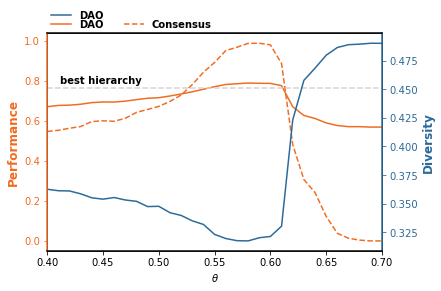

<Figure size 432x288 with 0 Axes>

In [16]:
# Twin
import numpy as np
x = np.arange(0.40, 0.71, 0.01)
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("$\\theta$", fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black",fontsize=12)

ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)

ax2.spines['left'].set_color(nature_orange) # left y-axis
ax1.yaxis.label.set_color(nature_orange) # left y-axis labels
ax1.tick_params(axis='y', colors=nature_orange) # left y-axis params
ax2.spines['right'].set_color(nature_blue) # right y-axis
ax2.yaxis.label.set_color(nature_blue)  # right y-axis labels
ax2.tick_params(axis='y', colors=nature_blue) # right y-axis params
plt.xlim([0.4, 0.70])

line_1 = ax1.plot(x, dao_performance, "k-", color=nature_orange, label="DAO")
line_2 = ax1.plot(x, dao_consensus, "k--", color = nature_orange, label="Consensus")

line_3 = ax2.plot(x, dao_diversity, "k-", color= nature_blue, label="DAO")

line_4 = ax1.plot(x, [hierarchy_reference[-1]] * len(x), "k--", color=shallow_grey)
ax1.annotate('best hierarchy', xy=(60, 208), xycoords='figure points', weight="bold")

lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=10, loc=(0, 1),  ncol=3, prop=legend_properties)

lines_2 = line_3
labs_2 = [l.get_label() for l in lines_1]
ax2.legend(lines_2, labs_2, frameon=False, fontsize=10, loc=(0, 1.04),  ncol=3, prop=legend_properties)

plt.savefig(data_folder + r"\Threshold_performance_diversity_2.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()
plt.clf()


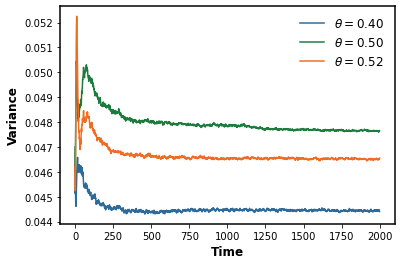

0.04827499455855399 0.9921310117271641
0.048001791101312676 0.9943406838314619
0.047652873587535644 0.9927311563637156


<Figure size 432x288 with 0 Axes>

In [17]:
# Test Variance
# View the iteration for threshold=0.5
# x = np.arange(0.40, 0.71, 0.01)
x = range(len(dao_original_performance[0]))
# x = range(501)
fig, (ax1) = plt.subplots(1, 1)

ax1.spines["left"].set_linewidth(1.5)
ax1.spines["right"].set_linewidth(1.5)
ax1.spines["top"].set_linewidth(1.5)
ax1.spines["bottom"].set_linewidth(1.5)

ax1.plot(x, dao_original_variance[0], "k-", label="$\\theta=0.40$", color=nature_blue)
ax1.plot(x, dao_original_variance[10], "k-", label="$\\theta=0.50$", color=nature_green)
ax1.plot(x, dao_original_variance[12], "k-", label="$\\theta=0.52$", color=nature_orange)
# ax1.plot(x, dao_original_variance[20], "k-", label="$\\theta=0.60$", color=nature_orange)
# ax1.plot(x, dao_original_variance[20], "y-", label="$\\theta=0.6$")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Variance_across_threshold_1.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print(dao_original_variance[10][301], dao_original_variance[10][301] / dao_original_variance[10][201])
print(dao_original_variance[10][501], dao_original_variance[10][501] / dao_original_variance[10][301])
print(dao_original_variance[10][-1], dao_original_variance[10][-1] / dao_original_variance[10][501])

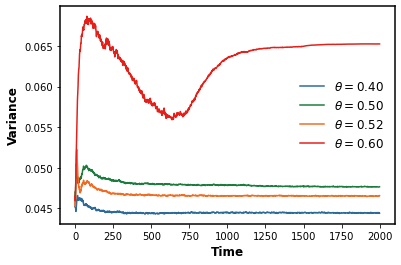

0.04827499455855399 0.9921310117271641
0.048001791101312676 0.9943406838314619
0.047652873587535644 0.9927311563637156


<Figure size 432x288 with 0 Axes>

In [18]:
# Test Variance
# View the iteration for threshold=0.5
# x = np.arange(0.40, 0.71, 0.01)
x = range(len(dao_original_performance[0]))
# x = range(501)
fig, (ax1) = plt.subplots(1, 1)

ax1.spines["left"].set_linewidth(1.5)
ax1.spines["right"].set_linewidth(1.5)
ax1.spines["top"].set_linewidth(1.5)
ax1.spines["bottom"].set_linewidth(1.5)

ax1.plot(x, dao_original_variance[0], "k-", label="$\\theta=0.40$", color=nature_blue)
ax1.plot(x, dao_original_variance[10], "k-", label="$\\theta=0.50$", color=nature_green)
ax1.plot(x, dao_original_variance[12], "k-", label="$\\theta=0.52$", color=nature_orange)
ax1.plot(x, dao_original_variance[20], "k-", label="$\\theta=0.60$", color=morandi_red)
# ax1.plot(x, dao_original_variance[20], "y-", label="$\\theta=0.6$")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Variance_across_threshold_2.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print(dao_original_variance[10][301], dao_original_variance[10][301] / dao_original_variance[10][201])
print(dao_original_variance[10][501], dao_original_variance[10][501] / dao_original_variance[10][301])
print(dao_original_variance[10][-1], dao_original_variance[10][-1] / dao_original_variance[10][501])